In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [29]:
class Model(nn.Module):
    def __init__(self,insize,outsize):
        super().__init__()
        self.hidden1=nn.Linear(insize,320)
        self.act1=nn.ReLU()
        self.hidden2=nn.Linear(320,160)
        self.act2=nn.ReLU()
        self.hidden3=nn.Linear(160,40)
        self.act3=nn.ReLU()
        self.hidden4=nn.Linear(40,32)
        self.act4=nn.ReLU()
        self.hidden5=nn.Linear(32,8)
        self.act5=nn.ReLU()
        self.hidden6=nn.Linear(8,outsize)
        self.act6=nn.Sigmoid()
    def forward(self,x):
        x=self.act1(self.hidden1(x))
        x=self.act2(self.hidden2(x))
        x=self.act3(self.hidden3(x))
        x=self.act4(self.hidden4(x))
        x=self.act5(self.hidden5(x))
        x=self.act6(self.hidden6(x))
        return x


In [30]:
model=Model(200,2)
model.eval()

Model(
  (hidden1): Linear(in_features=200, out_features=320, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=320, out_features=160, bias=True)
  (act2): ReLU()
  (hidden3): Linear(in_features=160, out_features=40, bias=True)
  (act3): ReLU()
  (hidden4): Linear(in_features=40, out_features=32, bias=True)
  (act4): ReLU()
  (hidden5): Linear(in_features=32, out_features=8, bias=True)
  (act5): ReLU()
  (hidden6): Linear(in_features=8, out_features=2, bias=True)
  (act6): Sigmoid()
)

In [31]:
df=pd.read_csv('./Output/glcmpca1000pca200.csv')
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,191,192,193,194,195,196,197,198,199,200
0,0,-3.970801,-90.219696,-45.437277,70.400459,32.454718,-43.263047,-55.026636,14.504374,49.632594,...,2.995869,-1.446273,0.145844,4.812262,-2.565947,0.931057,5.580389,-1.810605,-9.299060,0
1,1,150.687179,-92.253366,-36.780443,-21.587428,-40.188326,-10.442911,-31.239209,3.679613,-17.815154,...,6.215410,3.242948,-14.543323,17.354123,-3.323724,4.690492,-2.308038,-4.413196,-13.586323,0
2,2,15.883242,83.780857,-86.653360,7.202755,7.741978,0.390929,46.106146,-9.898993,-33.774234,...,1.306046,2.051018,4.305764,-0.454097,0.252460,-0.790770,1.040472,0.792612,-1.082138,0
3,3,-30.901043,-3.935036,47.714830,18.579831,-21.884824,4.277487,-14.898174,-11.523572,-19.178420,...,1.395771,0.510259,3.100186,-0.741926,-2.528742,-2.174834,-2.283928,6.955956,2.796807,0
4,4,29.625496,63.016158,-46.122664,-23.263225,26.408949,-24.197561,21.742538,-8.627393,16.002553,...,-0.890465,4.892572,0.130623,4.393123,-2.922084,-4.531249,-0.351662,-2.266072,2.957495,0


In [32]:
x=df.iloc[:,1:201].values
y=df.iloc[:,-1].values
x=torch.FloatTensor(x)
y=torch.LongTensor(y)

In [33]:
# x

In [34]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)
xtrain=torch.FloatTensor(xtrain)
xtest=torch.FloatTensor(xtest)

In [35]:
optimizer=optim.Adam(model.parameters(),lr=0.001)
loss=nn.CrossEntropyLoss()
nepoch=50
batch_size=10

In [36]:
trainlosses=np.zeros(nepoch)
for epoch in range(nepoch):
    resloss=0
    for i in range(0,len(xtrain),batch_size):
        optimizer.zero_grad()
        xbatch=xtrain[i:i+batch_size]
        ypred=model(xbatch)
        trainloss=loss(ypred,ytrain[i:i+batch_size])
        trainloss.backward()
        optimizer.step()
        resloss+=trainloss.item()
    trainlosses[epoch]=resloss
    print(f"Epoch {epoch+1}/{nepoch}, train loss : {trainloss.item():.4f}")

Epoch 1/50, train loss : 0.6791
Epoch 2/50, train loss : 0.5800
Epoch 3/50, train loss : 0.5103
Epoch 4/50, train loss : 0.3134
Epoch 5/50, train loss : 0.3149
Epoch 6/50, train loss : 0.3139
Epoch 7/50, train loss : 0.4137
Epoch 8/50, train loss : 0.4135
Epoch 9/50, train loss : 0.3147
Epoch 10/50, train loss : 0.3135
Epoch 11/50, train loss : 0.3136
Epoch 12/50, train loss : 0.3481
Epoch 13/50, train loss : 0.3133
Epoch 14/50, train loss : 0.3136
Epoch 15/50, train loss : 0.3133
Epoch 16/50, train loss : 0.3133
Epoch 17/50, train loss : 0.3142
Epoch 18/50, train loss : 0.3133
Epoch 19/50, train loss : 0.3133
Epoch 20/50, train loss : 0.3133
Epoch 21/50, train loss : 0.3133
Epoch 22/50, train loss : 0.3133
Epoch 23/50, train loss : 0.3133
Epoch 24/50, train loss : 0.3134
Epoch 25/50, train loss : 0.3133
Epoch 26/50, train loss : 0.3133
Epoch 27/50, train loss : 0.3133
Epoch 28/50, train loss : 0.3133
Epoch 29/50, train loss : 0.3133
Epoch 30/50, train loss : 0.3133
Epoch 31/50, train 

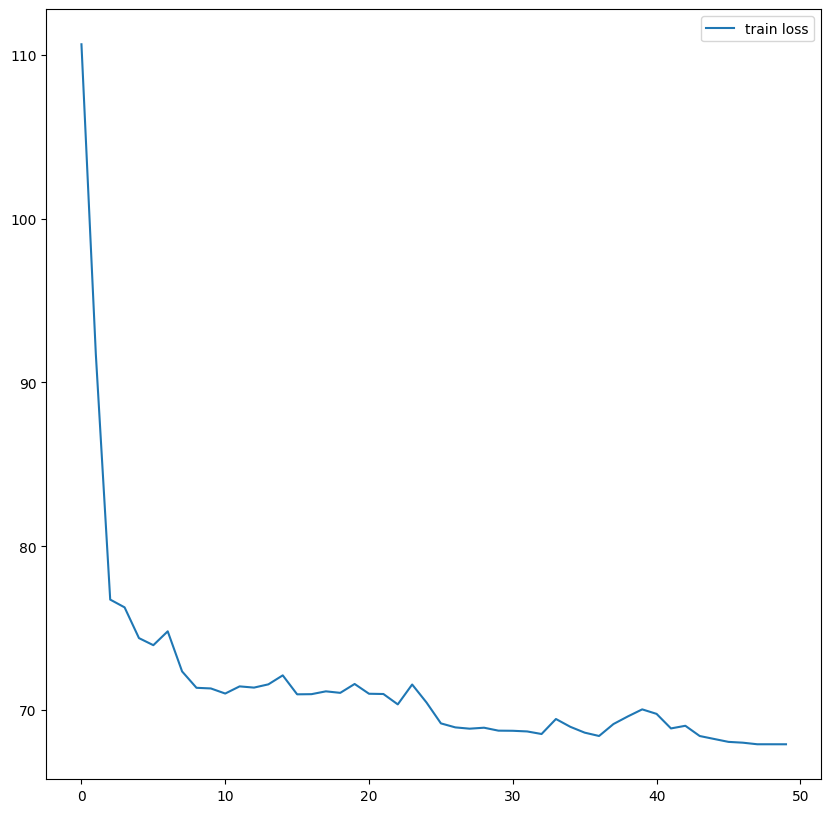

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(trainlosses,label='train loss')
plt.legend()
plt.show()

In [38]:
with torch.no_grad():
    y_pred=model(xtest)
y_pred=np.argmax(y_pred,axis=1)
accuracy=(y_pred==ytest).float().mean()
print(accuracy)

tensor(0.8000)


In [39]:
cf=confusion_matrix(y_pred,ytest)
cf

array([[174,  51],
       [ 29, 146]], dtype=int64)

In [40]:
fp=cf[0][1]/(cf[0][1]+cf[0][0])
fp

0.22666666666666666

<Axes: >

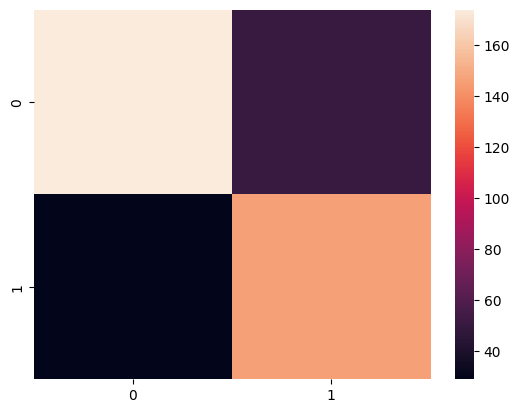

In [41]:
import seaborn as sns
sns.heatmap(cf)

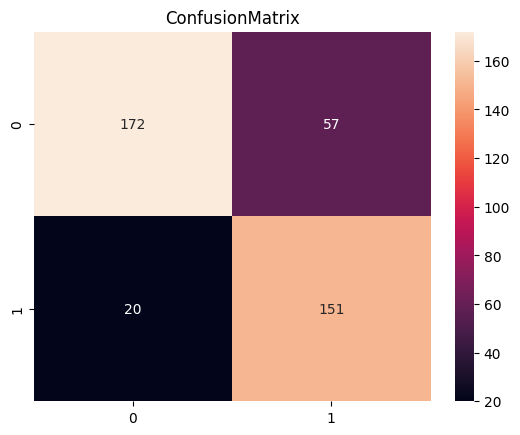

In [47]:
cm=[[172,57],[20,151]]
plt.title("ConfusionMatrix")
plt.xticks([0,1],["Actual Cover","Actual Stego"])
plt.yticks([0,1],["Predicted Cover","Predicted Stego"])
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

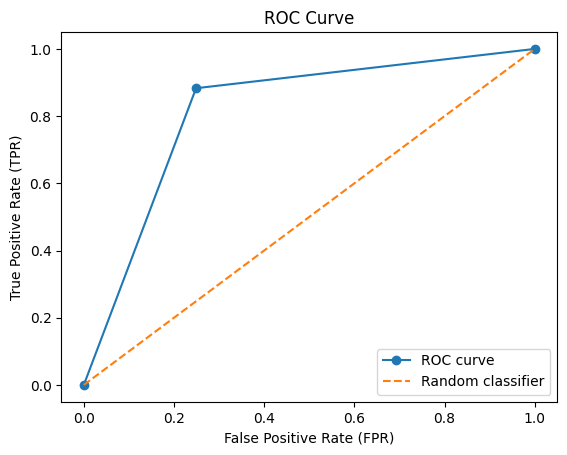

In [55]:
TP = 151
FP = 57
TN = 172
FN = 20

# Calculate true positive rate (sensitivity) and false positive rate
tpr = TP / (TP + FN)
fpr = FP / (FP + TN)
x=[0,fpr,1]
y=[0,tpr,1]
# Plot ROC curve
plt.plot(x, y, marker='o', label='ROC curve')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random classifier')

# Set labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()

# Show plot
plt.show()